# TAREA 1
---

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Abrimos y cargamos el dataset "ds_salaries.csv" en la variable "df"
df = pd.read_csv("./ds_salaries.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Miramos la información del dataset. Obsermaos el número de muestras, columnas y si tenemos algún NaN. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
# Función describe para observar algunos datos estadísticos
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
# De manera más escueta en el .info(), observamos el número de filas y columnas del dataset
df.shape

(3755, 11)

In [6]:
# Nos quedamos solo con las 1.000 primeras muestras
df = df.head(1000)

In [7]:
# Comprovamos el número de muestras(filas) = 1000
df.shape

(1000, 11)

In [8]:
# Eliminamos la columna "salary_in_usd"
df = df.drop('salary_in_usd', axis=1)

In [9]:
# Codificamos la variable "job_title"
df["job_code"] = df.job_title.astype("category").cat.codes

In [10]:
# Visalizamos 3 muestras, simplemente para ver que hemos codificado categóricamente la columna job_code
df.sample(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,job_code
845,2023,MI,FT,Research Scientist,340000,USD,US,100,US,M,51
472,2023,EX,FT,Data Engineer,286000,USD,US,100,US,M,24
90,2023,SE,FT,Data Engineer,140000,USD,US,0,US,M,24


In [11]:
# La varibale predictorá X será la columna "job_code" codificada
X = df[["job_code"]] # Simpre poner DOBLE CORCHETE
# La variable objetivo será "salary"
y = df["salary"]

In [12]:
# Instanciamos el modelo de Regresión Lineal 
model = LinearRegression()

## Entrenamos/creamos el modelo
model.fit(X, y)

LinearRegression()

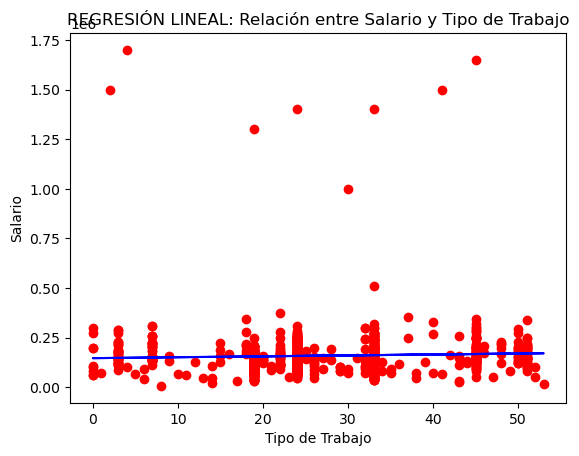

In [13]:
# Creación de la primera gráfica: REGRESIÓN LINEAL, scatter plot con X -> (job_encoded) y salary
plt.scatter(X, y, color='red')
predic_Salario = model.predict(X) # Por alguna razón me da problemas al hacer el model.predict(X) en la siguiente linea dentro del .plot(), por lo que se lo asigno a una variable.
plt.plot(X, predic_Salario, color = "blue")
plt.title("REGRESIÓN LINEAL: Relación entre Salario y Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Salario")
plt.show()

---
---
---

---
---
---

In [14]:
# Abrimos y cargamos el dataset "ds_salaries.csv" en la variable "df"
df = pd.read_csv("./ds_salaries.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [15]:
# Nos quedamos solo con las 1.000 primeras muestras
df = df.head(1000)

In [16]:
df.shape

(1000, 11)

In [17]:
# Eliminamos la columna "salary_in_usd"
df = df.drop('salary_in_usd', axis=1)
# Codificamos la variable "job_title"
df["job_code"] = df.job_title.astype("category").cat.codes

In [18]:
# La varibale predictorá X será la columna "job_code" codificada
X = df[["job_code"]] # Simpre poner DOBLE CORCHETE
# La variable objetivo será "salary"
y = df["salary"]

In [19]:
# Instanciamos el modelo de Regresión Lineal 
model_poly = PolynomialFeatures(degree = 2)

# Entrenamos/creamos el modelo
model_poly.fit(X)
X_poly = model_poly.transform(X)

In [20]:
# Instanciamos el modelo de regresión lineal
model_poly = LinearRegression()
# Entrenamos/creamos el modelo 
model_poly.fit(X_poly, y)

LinearRegression()

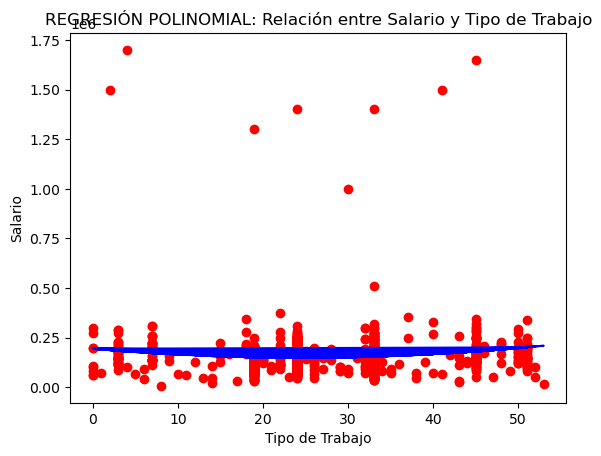

In [21]:
# Creación de la segunda gráfica: REGRESIÓN POLINOMIAL, scatter plot con X -> (job_encoded) y salary
plt.scatter(X, y, color = "red")
predic_Salario = model_poly.predict(X_poly)
plt.plot(X, predic_Salario, color ="blue")
plt.title("REGRESIÓN POLINOMIAL: Relación entre Salario y Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Salario")
plt.show()

---
---
---

---
---
---

In [22]:
# Abrimos y cargamos el dataset "ds_salaries.csv" en la variable "df"
df = pd.read_csv("./ds_salaries.csv")

In [23]:
# Nos quedamos solo con las 1.000 primeras muestras
df = df.head(1000)
# Eliminamos la columna "salary_in_usd"
df = df.drop('salary_in_usd', axis=1)
# Codificamos la variable "job_title"
df["job_code"] = df.job_title.astype("category").cat.codes

In [24]:
# La varibale predictorá X será la columna "job_code" codificada
X = df[["job_code"]] # Simpre poner DOBLE CORCHETE
# La variable objetivo será "salary"
y = df["salary"]

In [25]:
# Instanciamos el modelo de Regresión Polinomial 
model_poly2 = PolynomialFeatures(degree = 3)
## Entrenamos/creamos el modelo 
model_poly2.fit(X)
X_poly2 = model_poly2.transform(X)

In [26]:
# Instanciamos el modelo de regresión lineal
model_poly2 = LinearRegression()
# Entrenamos/creamos el modelo con 
model_poly2.fit(X_poly2, y)

LinearRegression()

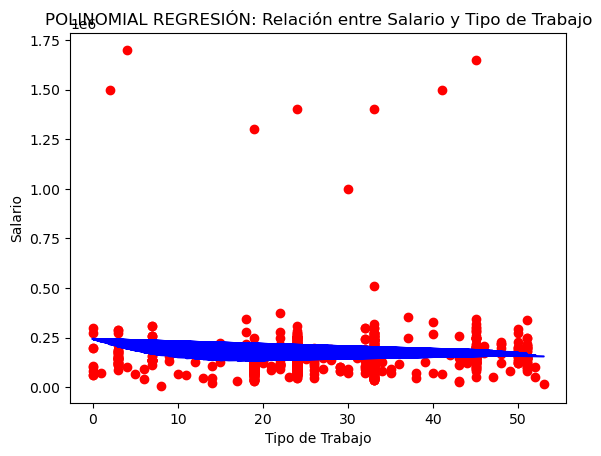

In [28]:
# Creación de la segunda gráfica: REGRESIÓN POLINOMIAL, scatter plot con X -> (job_encoded) y salary
plt.scatter(X, y, color = "red")
predict_Salario = model_poly2.predict(X_poly2)
plt.plot(X, predict_Salario, color ="blue")
plt.title("POLINOMIAL REGRESIÓN: Relación entre Salario y Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Salario")
plt.show()

---
---
---
---
---
---

In [29]:
# Creamos un diccionario con los distintos modelos
mdls = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Polinomial de Grado 2": PolynomialFeatures(degree = 2),
    "Regresión Polinomial de Grado 3": PolynomialFeatures(degree = 3)
}

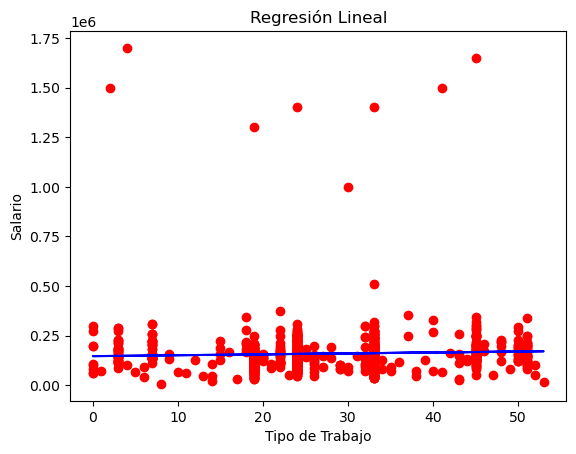

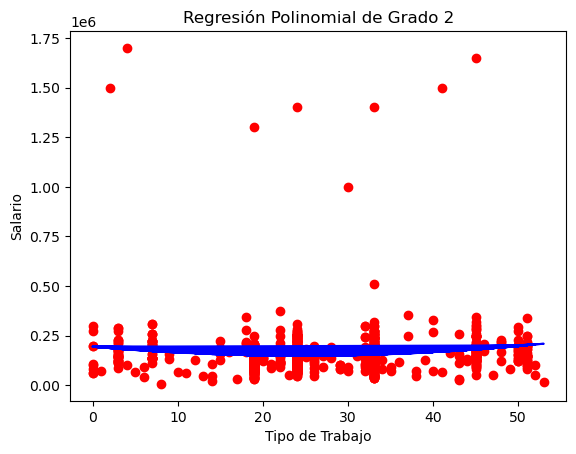

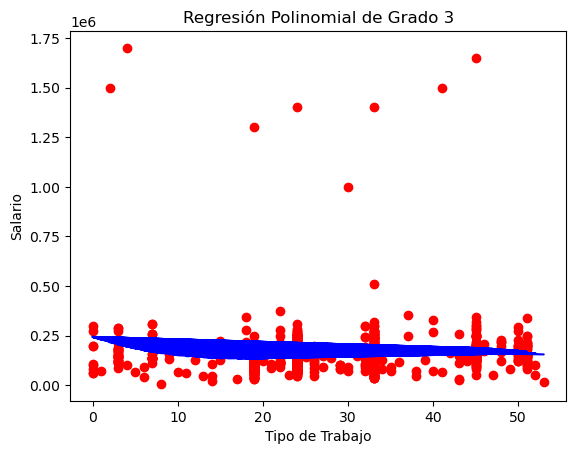

In [31]:
# Creamos un bucle para generar las gráficas
for nmbr_mdl, mdl in mdls.items():
    if isinstance(mdl, LinearRegression):
        mdl.fit(X, y)
        y_pred = mdl.predict(X)
        plt.scatter(X, y, color = "red")
        plt.plot(X, y_pred, color = "blue")
    elif isinstance(mdl, PolynomialFeatures):
        X_poly = mdl.fit_transform(X)
        rgs_lin = LinearRegression()
        rgs_lin.fit(X_poly, y)
        y_pred = rgs_lin.predict(X_poly)
        plt.scatter(X, y, color = "red")
        plt.plot(X, y_pred, color = "blue")
        
    plt.xlabel("Tipo de Trabajo")
    plt.ylabel("Salario")
    plt.title(nmbr_mdl)
    plt.show()